# Demonstration

This file is just for demonstration purpose.

## Three layers model

- Grid size: 101 $\times$ 101, with step size 0.01 (m),
- Source term: 10 Hz Ricker wavelet
- Frequency used: 1 3 5 7 9 11 13 15 Hz

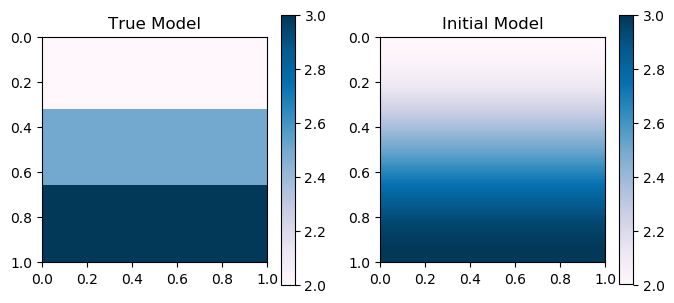

In [12]:
using JLD2, PyPlot;
include("forward_modelling.jl");
@load "three_data.jld2";
@load "data/three_layers.jld2" vel_true vel_init acq_fre;

x = linspace(0,1,101); y = linspace(0,1,101);
fig = figure("Model", figsize=(8,3.5))
ax = fig[:add_subplot](1,2,1)
pcolormesh(x,y,vel_true',cmap="PuBu"); colorbar(); title("True Model"); axis("scaled");
gca()[:invert_yaxis]()
ax = fig[:add_subplot](1,2,2)
pcolormesh(x,y,vel_init',cmap="PuBu"); colorbar(); title("Initial Model"); axis("scaled");
gca()[:invert_yaxis]()

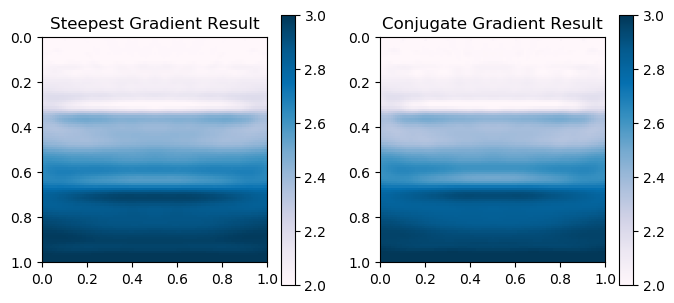

In [13]:
fig = figure("Model", figsize=(8,3.5))
ax = fig[:add_subplot](1,2,1)
pcolormesh(x,y,vel_sg',cmap="PuBu"); colorbar(); title("Steepest Gradient Result"); axis("scaled");
gca()[:invert_yaxis]()
ax = fig[:add_subplot](1,2,2)
pcolormesh(x,y,vel_cg',cmap="PuBu"); colorbar(); title("Conjugate Gradient Result"); axis("scaled");
gca()[:invert_yaxis]()

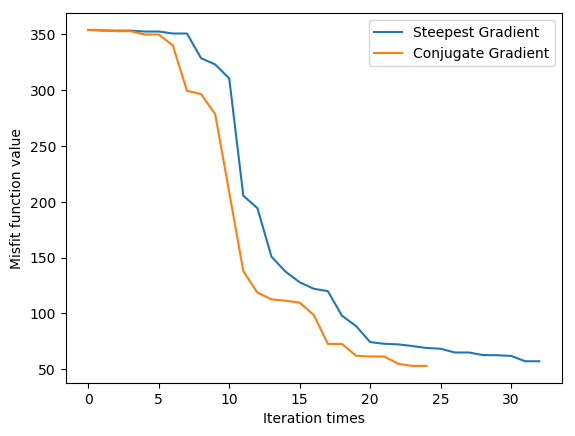

PyObject <matplotlib.legend.Legend object at 0x137fbeed0>

In [14]:
fig = figure("Misfit func")
plot(mis_sg); plot(mis_cg);
xlabel("Iteration times"); ylabel("Misfit function value");
legend(["Steepest Gradient","Conjugate Gradient"])

## Overthrust Model

- Grid size: 401 $\times$ 131, with step size 25 (m),
- Source term: 10 Hz Ricker wavelet
- Frequency used: 1 3 5 7 9 11 13 15 Hz

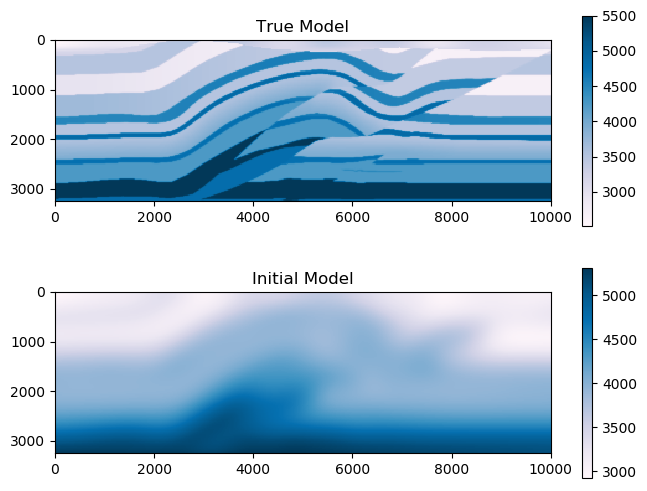

In [15]:
@load "overthrust_small_result_sg.jld2"
@load "overthrust_small_result.jld2"
@load "data/overthrust_small.jld2" vel_true vel_init acq_fre

h = acq_fre.h; Nx = acq_fre.Nx; Ny = acq_fre.Ny;
x = linspace(0,(Nx-1)*h,Nx);
y = linspace(0,(Ny-1)*h,Ny);

fig = figure("Model", figsize=(8,6))
ax = fig[:add_subplot](2,1,1)
pcolormesh(x,y,vel_true',cmap="PuBu"); colorbar(); title("True Model"); axis("scaled");
gca()[:invert_yaxis]()
ax = fig[:add_subplot](2,1,2)
pcolormesh(x,y,vel_init',cmap="PuBu"); colorbar(); title("Initial Model"); axis("scaled");
gca()[:invert_yaxis]()

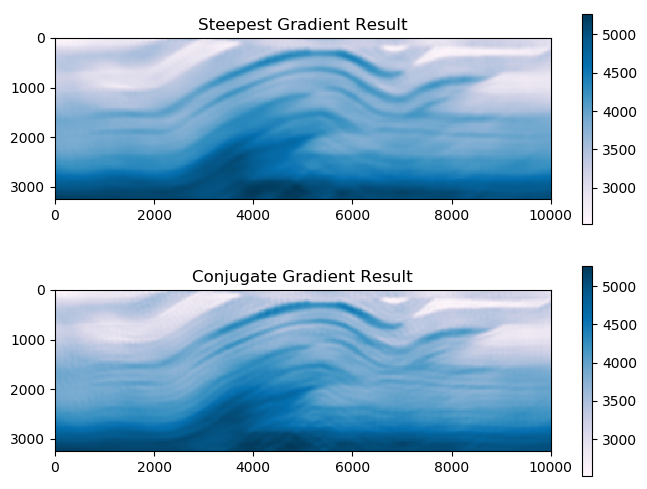

In [16]:
fig = figure("Model", figsize=(8,6))
ax = fig[:add_subplot](2,1,1)
pcolormesh(x,y,vel_sg',cmap="PuBu"); colorbar(); title("Steepest Gradient Result"); axis("scaled");
gca()[:invert_yaxis]()
ax = fig[:add_subplot](2,1,2)
pcolormesh(x,y,vel_cg',cmap="PuBu"); colorbar(); title("Conjugate Gradient Result"); axis("scaled");
gca()[:invert_yaxis]()

The result for conjugate gradient method is not as good as steepest gradient might because:
1. the chosen line search step size is not good for cg method
2. 15 Hz frequency is too high